In [ ]:
("Triadic closure", lambda g: nx.triadic_census(g)),
http://vlado.fmf.uni-lj.si/pub/networks/doc/triads/triads.pdf
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.triads.triadic_census.html
nx.communicability(g) 

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

def triad_graphs():
    tg = {}
    triad_names = ['1-003','2-012','3-102','4-021D','5-021U','6-021C','7-111D','8-111U','9-030T','10-030C','11-201','12-120D','13-120C','14-120U','15-210','16-300']
    
    for triad_name in triad_names:
        g = nx.DiGraph()
        g.add_nodes_from('abc')
        tg[triad_name] = g
    
    tg['2-012'].add_edges_from([('a', 'b')])
    tg['3-102'].add_edges_from([('a', 'b'), ('b', 'a')])
    tg['4-021D'].add_edges_from([('b', 'a'), ('b', 'c')])
    tg['5-021U'].add_edges_from([('a', 'b'), ('c', 'b')])
    tg['6-021C'].add_edges_from([('a', 'b'), ('b', 'c')])
    tg['7-111D'].add_edges_from([('a', 'c'), ('c', 'a'), ('b', 'c')])
    tg['8-111U'].add_edges_from([('a', 'c'), ('c', 'a'), ('c', 'b')])
    tg['9-030T'].add_edges_from([('a', 'b'), ('c', 'b'), ('a', 'c')])
    tg['10-030C'].add_edges_from([('b', 'a'), ('c', 'b'), ('a', 'c')])
    tg['11-201'].add_edges_from([('a', 'b'), ('b', 'a'), ('a', 'c'), ('c', 'a')])
    tg['12-120D'].add_edges_from([('b', 'c'), ('b', 'a'), ('a', 'c'), ('c', 'a')])
    tg['13-120C'].add_edges_from([('a', 'b'), ('b', 'c'), ('a', 'c'), ('c', 'a')])
    tg['14-120U'].add_edges_from([('a', 'b'), ('c', 'b'), ('a', 'c'), ('c', 'a')])
    tg['15-210'].add_edges_from([('a', 'b'), ('b', 'c'), ('c', 'b'), ('a', 'c'), ('c', 'a')])
    tg['16-300'].add_edges_from([('a', 'b'), ('b', 'a'), ('b', 'c'), ('c', 'b'), ('a', 'c'), ('c', 'a')])
    
    return tg

In [4]:
import networkx as nx 
from src.utils import fileio
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

path = "/home/milky/drosophila-SNA/data/processed/1_1_create_snapshots/30_sec_window/CsCh"

all_groups = fileio.load_multiple_folders(path)
dfs = []  # Initialize a list to store DataFrames for each group

for group_name, group_path in all_groups.items():
    all_graphs = fileio.load_files_from_folder(group_path, '.gml')
    res = {}
    for graph_name, graph_path in all_graphs.items(): 
        g = nx.read_gml(graph_path)
        time_stamp = int(graph_name.replace(".gml", ""))
        res[time_stamp] = nx.triadic_census(g) 

    df = pd.DataFrame.from_dict(res)
    df = df.T
    dfs.append(df)

triad_graphs_dict = triad_graphs()
num_triads = len(triad_graphs_dict)
fig, axes = plt.subplots(1, num_triads, figsize=(4 * num_triads, 4))
for i, (triad_name, graph) in enumerate(triad_graphs_dict.items()):
    ax = axes[i]
    ax.set_title(triad_name, fontsize=45)
    pos = nx.circular_layout(graph)
    
    nx.draw_networkx(graph, pos, ax=ax, with_labels=True, node_color='black', edge_color='black',
                     node_size=950, arrowstyle='-|>', arrowsize=65, width=5.0)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# Combine DataFrames for each group into a single DataFrame
combined_data = pd.concat(dfs, keys=all_groups.keys(), names=['Group', 'Snapshot'])

# Boxplot with custom width
plt.figure(figsize=(14, 6))
sns.boxplot(data=combined_data, width=0.6)  # Adjust the width as needed
plt.xlabel('Snapshot')
# plt.ylabel('Triadic Census')
plt.title('Triadic Census Boxplot for Different Snapshots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


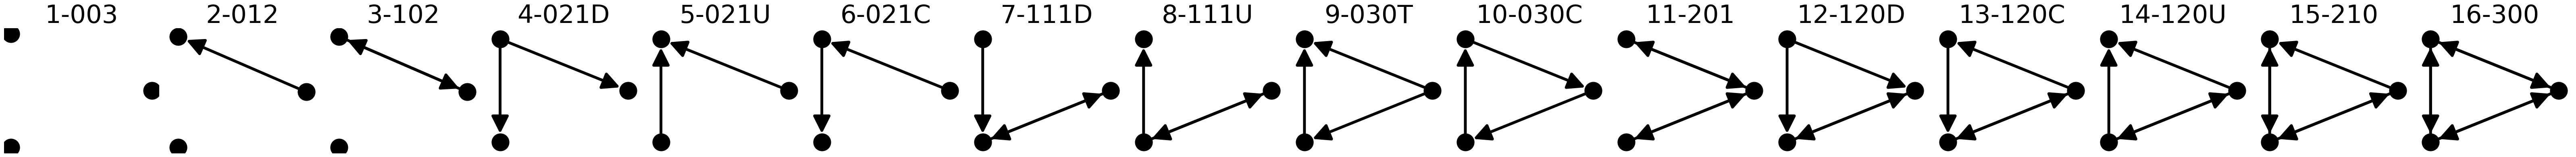

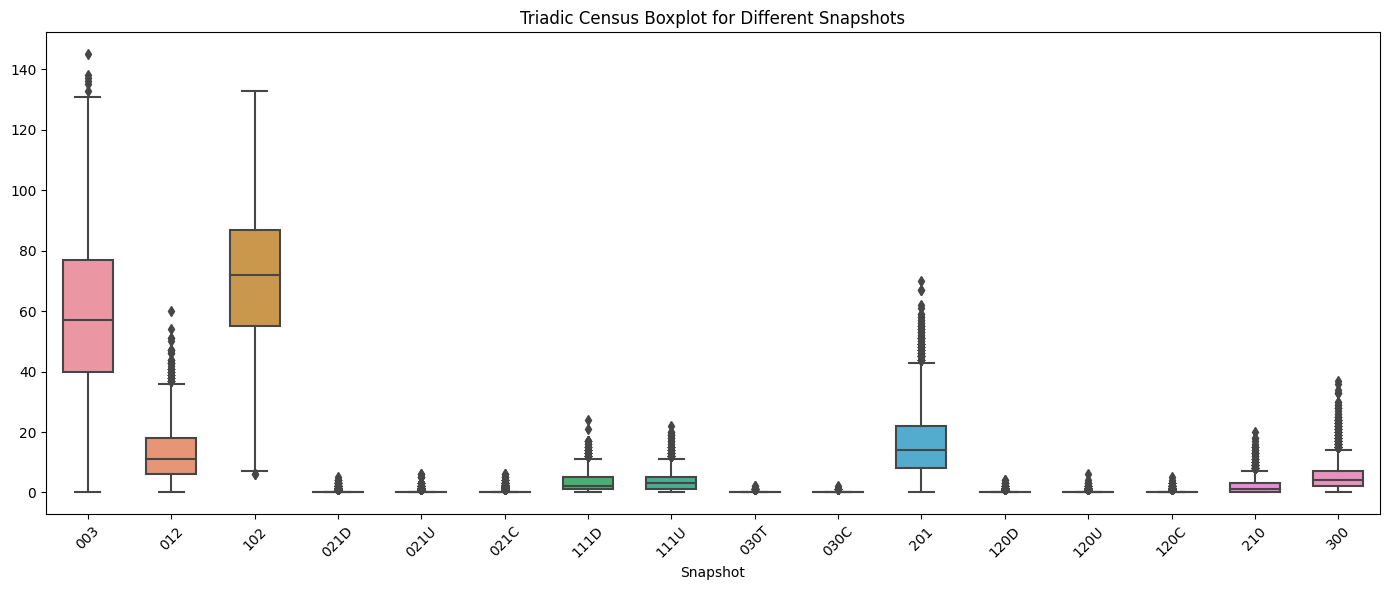

In [9]:
import networkx as nx 
from src.utils import fileio
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

path = "/home/milky/drosophila-SNA/data/processed/1_1_create_snapshots/10_sec_window/CsCh"

all_groups = fileio.load_multiple_folders(path)
dfs = []  # Initialize a list to store DataFrames for each group

for group_name, group_path in all_groups.items():
    all_graphs = fileio.load_files_from_folder(group_path, '.gml')
    res = {}
    for graph_name, graph_path in all_graphs.items(): 
        g = nx.read_gml(graph_path)
        time_stamp = int(graph_name.replace(".gml", ""))
        res[time_stamp] = nx.triadic_census(g) 

    df = pd.DataFrame.from_dict(res)
    df = df.T
    dfs.append(df)

triad_graphs_dict = triad_graphs()
num_triads = len(triad_graphs_dict)
fig, axes = plt.subplots(1, num_triads, figsize=(4 * num_triads, 4))
for i, (triad_name, graph) in enumerate(triad_graphs_dict.items()):
    ax = axes[i]
    ax.set_title(triad_name, fontsize=45)
    pos = nx.circular_layout(graph)
    
    nx.draw_networkx(graph, pos, ax=ax, with_labels=True, node_color='black', edge_color='black',
                     node_size=950, arrowstyle='-|>', arrowsize=65, width=5.0)
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# Combine DataFrames for each group into a single DataFrame
combined_data = pd.concat(dfs, keys=all_groups.keys(), names=['Group', 'Snapshot'])

# Boxplot with custom width
plt.figure(figsize=(14, 6))
sns.boxplot(data=combined_data, width=0.6)  # Adjust the width as needed
plt.xlabel('Snapshot')
# plt.ylabel('Triadic Census')
plt.title('Triadic Census Boxplot for Different Snapshots')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
